In [2]:

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from pathlib import Path
from astropy.io import fits
import numpy as np
import os
import scipy.stats as stats


In [3]:
data_dir = Path("C:/Users/ajo5182/Documents/astro/y2024-12-09")
# take the names of all folders within the specified directory
folder_list = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))] 

In [43]:
pvalx = np.array([np.nan]*len(folder_list))
pvaly = np.array([np.nan]*len(folder_list))
window =10 #  number of pixels to either side of the peak


In [44]:
for a in range(len(folder_list)): 
    if os.path.isfile(f"{data_dir}/{folder_list[a]}/Analysis/imaging_analysis_20241213/Figures/imaging_source.png"):
    
        data_path = Path(f"{data_dir}/{folder_list[a]}/Analysis/imaging_analysis_20241213/image_reconstruction.fits.gz")
        d = fits.open(data_path) # open fits file
        
        data = d[0].data # data contents of the fits file
        shape =  data.shape

        peak = np.max(data)
        peak_loc = np.unravel_index(np.argmax(data),data.shape)
     


        #x_window =x[peak_loc[1]-window:peak_loc[1]+window]
        #y_window =y [peak_loc[0]-window:peak_loc[0]+window]

        windowed_data = data[peak_loc[0]-window:peak_loc[0]+window, peak_loc[1]-window:peak_loc[1]+window]
            
        shapiro_result = stats.shapiro(windowed_data, axis=0)
        pvalx[a] = np.mean(shapiro_result.pvalue)
        shapiro_result = stats.shapiro(windowed_data, axis=1)
        pvaly[a] = np.mean(shapiro_result.pvalue)

In [45]:
pvalx = pvalx[~np.isnan(pvalx)]
pvaly = pvaly[~np.isnan(pvaly)]

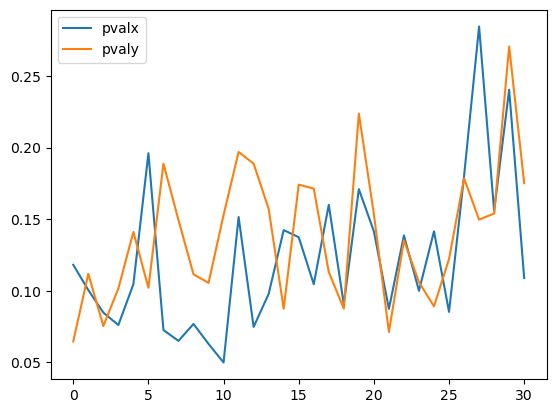

In [51]:
plt.plot(pvalx)
plt.plot(pvaly)
leg = ['pvalx', 'pvaly']
plt.legend(leg)
plt.savefig('pval')
